# Практикум №3
"Класифiкацiя та регресія на основі багатошарового персептрона"

Варіант №13

Виконали: студенти 3-го курсу, групи КІ-33 Гермаш А. Попович Д. Сімоненко А.

# Хід виконання роботи | Набір даних А

Приєднаємо потрібні бібліотеки та завантажимо початкові дані А.

In [60]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# --- Початкові дані А ---
n_samples_1, n_samples_2 = 1000, 100
centers = [[0.0, 0.0], [-2.0, -2.0]]
clusters_std = [2.0, 1.0]

X, y = make_blobs(
    n_samples=[n_samples_1, n_samples_2],
    centers=centers,
    cluster_std=clusters_std,
    random_state=0,
    shuffle=False
)

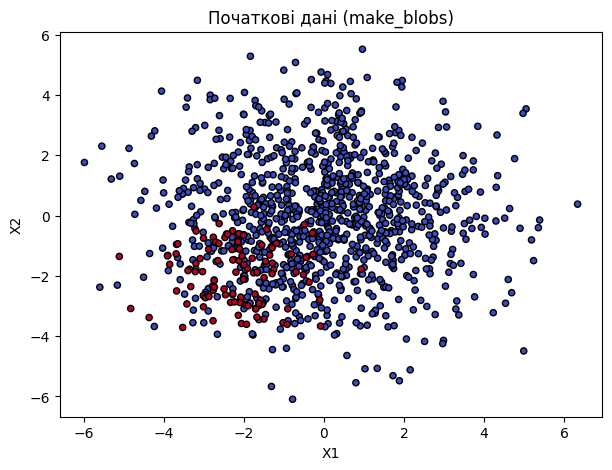

In [61]:
# --- 1. Візуалізація початкових даних ---
plt.figure(figsize=(7, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", s=20, edgecolor="k")
plt.title("Початкові дані (make_blobs)")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()

In [62]:
# --- 2. Розбиття на навчальний та валідаційний набори ---
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.3,
    stratify=y,
    random_state=42
)

print("Розмір навчального набору:", X_train.shape)
print("Розмір валідаційного набору:", X_val.shape)

Розмір навчального набору: (770, 2)
Розмір валідаційного набору: (330, 2)


In [63]:
# Зберігаємо копії набору A для подальшого використання у задачах 10-14
X_train_A = X_train.copy()
X_val_A = X_val.copy()
y_train_A = y_train.copy()
y_val_A = y_val.copy()

Побудуємо модель з одним скритим шаром з динамічним додаванням нейронів до прихованого шару.

З графіку видно, що модель нейронної мережі з одним прихованим шаром досягає точності понад 90%, тому одного шару достатньо для опису даних А.
Найоптимальніша кількість нейронів у прихованому шарі — 20.

In [64]:
# Побудуємо модель з одним шаром та кількістю нейронів — 20
best_model = MLPClassifier(hidden_layer_sizes=(20,),
                           activation='relu',
                           max_iter=1000,
                           random_state=42)
best_model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(20,), max_iter=1000, random_state=42)

Представимо моделі графічно, для цього побудуємо границі рішень графічно.

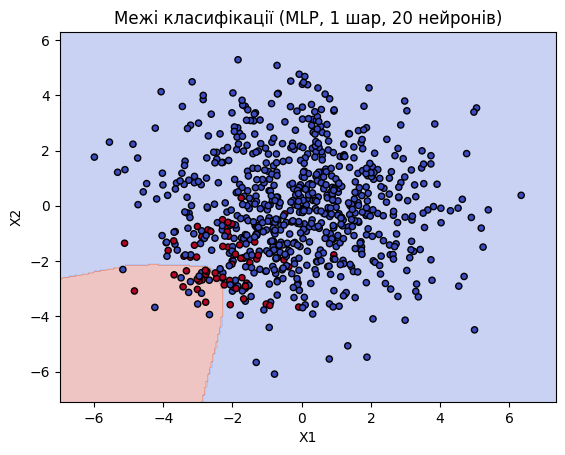

In [65]:
# --- 4. Графічна побудова границі рішень ---
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    # Передбачення на сітці
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Контурний графік рішень
    plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", s=20, edgecolor="k")
    
    plt.title(title)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()

plot_decision_boundary(best_model, X_train, y_train, "Межі класифікації (MLP, 1 шар, 20 нейронів)")

In [66]:
# --- 5. Прогнози та оцінка точності ---
y_pred = best_model.predict(X_val)
print("Точність моделі:", accuracy_score(y_val, y_pred))

Точність моделі: 0.9121212121212121


# Хід роботи | Набір даних Б

Приєднаємо потрібні бібліотеки та завантажимо початкові дані Б.

In [67]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# --- Початкові дані Б ---
digits = load_digits()
X = digits.data
y = digits.target

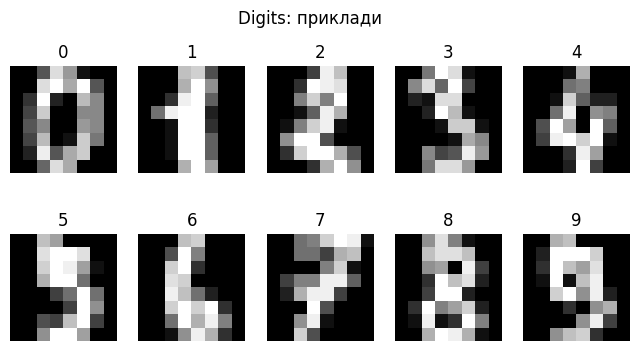

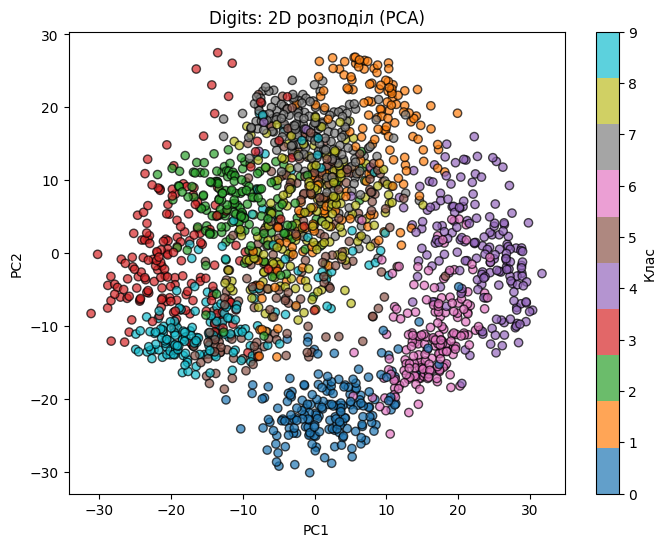

In [68]:
# --- 1. Візуалізація початкових даних ---
# Приклади цифр
fig, axes = plt.subplots(2,5, figsize=(8,4))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(digits.target[i])
    ax.axis('off')
plt.suptitle("Digits: приклади")
plt.show()

# PCA для 2D візуалізації
pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_2d[:,0], X_2d[:,1], c=y, cmap='tab10', edgecolor='k', alpha=0.7)
plt.title("Digits: 2D розподіл (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(scatter, label="Клас")
plt.show()

In [69]:
# --- 2. Розбиття на навчальний та валідаційний набори ---
X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.3,
    stratify=y,
    random_state=42
)
print("Розмір навчального набору:", X_train.shape)
print("Розмір валідаційного набору:", X_val.shape)

Розмір навчального набору: (1257, 64)
Розмір валідаційного набору: (540, 64)


In [70]:
# Зберігаємо копії набору B для подальшого використання у задачах 10-14
X_train_B = X_train.copy()
X_val_B = X_val.copy()
y_train_B = y_train.copy()
y_val_B = y_val.copy()

Побудуємо модель з одним скритим шаром з динамічним додаванням нейронів до прихованого шару.

З графіку видно, що модель нейронної мережі з одним прихованим шаром досягає точності понад 90%, тому одного шару достатньо для опису даних Б.
Найоптимальніша кількість нейронів у прихованому шарі — 70.

In [71]:
# Побудуємо модель з одним шаром та кількістю нейронів — 70
best_model = MLPClassifier(hidden_layer_sizes=(70,),
                           activation='relu',
                           max_iter=1000,
                           random_state=42)
best_model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(70,), max_iter=1000, random_state=42)

Представимо моделі графічно, для цього побудуємо границі рішень графічно.

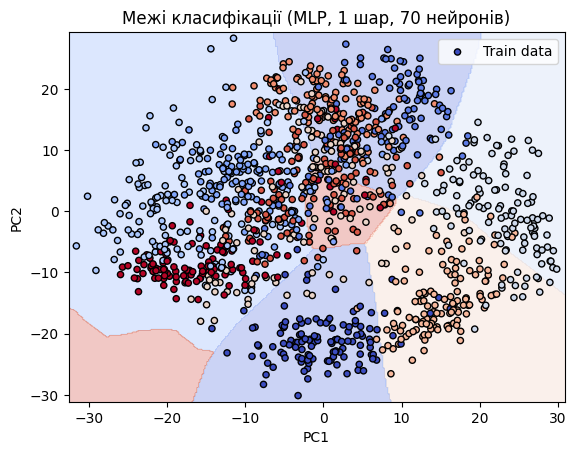

In [72]:
# --- 4. Графічна побудова границі рішень ---
def plot_decision_boundary_pca(model, X_2d, y, title):
    x_min, x_max = X_2d[:,0].min()-1, X_2d[:,0].max()+1
    y_min, y_max = X_2d[:,1].min()-1, X_2d[:,1].max()+1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    
    # Інверсна трансформація PCA
    X_grid = pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()])
    Z = model.predict(X_grid).reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
    plt.scatter(X_2d[:,0], X_2d[:,1], c=y, cmap="coolwarm", s=20, edgecolor="k", label="Train data")
    
    plt.title(title)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend()
    plt.show()


pca_train = PCA(n_components=2)
X_train_2d = pca_train.fit_transform(X_train)

plot_decision_boundary_pca(best_model, X_train_2d, y_train,
                           "Межі класифікації (MLP, 1 шар, 70 нейронів)")


In [73]:
# --- 5. Прогнози та оцінка точності ---
y_pred = best_model.predict(X_val)
print("Точність моделі:", accuracy_score(y_val, y_pred))

Точність моделі: 0.9796296296296296


# Хід виконання роботи | Набір даних А

In [74]:
# --- Імпорти для завдань 6-9 (вибірка А) ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (precision_recall_curve, roc_curve, auc, accuracy_score)
import warnings
warnings.filterwarnings('ignore')

In [75]:
# --- Динамічне додавання нейронів: починаємо з одношарового ---
min_acc_threshold = 0.85
neurons_list = [1, 5, 10, 20, 50, 100, 200]
mlp_models = {}
y_train_pred_dict = {}
y_pred_dict = {}
single_layer_sufficient = False
optimal_neurons = None

print("=== Динамічне додавання нейронів до одношарового MLP ===")
for n in neurons_list:
    model_name = f'MLP_{n}'
    mlp = MLPClassifier(
        hidden_layer_sizes=(n,),
        max_iter=2000,
        random_state=42,
        early_stopping=True,
        validation_fraction=0.1,
        n_iter_no_change=10
    )
    mlp.fit(X_train, y_train)
    
    y_train_pred = mlp.predict(X_train)
    y_pred = mlp.predict(X_val)
    
    acc_train = accuracy_score(y_train, y_train_pred)
    acc_val = accuracy_score(y_val, y_pred)
    
    mlp_models[model_name] = mlp
    y_train_pred_dict[model_name] = y_train_pred
    y_pred_dict[model_name] = y_pred
    
    print(f"{model_name}: Train Acc = {acc_train:.4f}, Val Acc = {acc_val:.4f}")
    
    if acc_val >= min_acc_threshold:
        single_layer_sufficient = True
        optimal_neurons = n
        print(f"Одношарова модель достатня з {n} нейронами.")
        break

# Якщо одношарова недостатня — додаємо двошарові
if not single_layer_sufficient:
    print("\n=== Додаємо двошарові моделі ===")
    layer_configs = [(50, 10), (100, 50), (100, 100)]
    for config in layer_configs:
        model_name = f'MLP_{config[0]}_{config[1]}'
        mlp = MLPClassifier(
            hidden_layer_sizes=config,
            max_iter=2000,
            random_state=42,
            early_stopping=True
        )
        mlp.fit(X_train, y_train)
        
        y_train_pred = mlp.predict(X_train)
        y_pred = mlp.predict(X_val)
        
        acc_train = accuracy_score(y_train, y_train_pred)
        acc_val = accuracy_score(y_val, y_pred)
        
        mlp_models[model_name] = mlp
        y_train_pred_dict[model_name] = y_train_pred
        y_pred_dict[model_name] = y_pred
        
        print(f"{model_name}: Train Acc = {acc_train:.4f}, Val Acc = {acc_val:.4f}")
        
        if acc_val >= min_acc_threshold:
            print(f"Двошарова модель достатня: {config}")
            break

=== Динамічне додавання нейронів до одношарового MLP ===
MLP_1: Train Acc = 0.1146, Val Acc = 0.1093
MLP_5: Train Acc = 0.0883, Val Acc = 0.0926
MLP_10: Train Acc = 0.8990, Val Acc = 0.8667
Одношарова модель достатня з 10 нейронами.


In [76]:
# --- 6. Оцінка перенавчання: accuracy на train і val ---
print("\n=== 6. Оцінка перенавчання ===")
overfitting_data = []
for model_name in mlp_models:
    acc_train = accuracy_score(y_train, y_train_pred_dict[model_name])
    acc_val = accuracy_score(y_val, y_pred_dict[model_name])
    diff = acc_train - acc_val
    overfitting_data.append({
        'Модель': model_name,
        'Accuracy Train': acc_train,
        'Accuracy Val': acc_val,
        'Різниця (Train - Val)': diff
    })

overfitting_table = pd.DataFrame(overfitting_data)
print("Таблиця оцінки перенавчання:")
print(overfitting_table.round(4))

# Висновок про перенавчання
for idx, row in overfitting_table.iterrows():
    if row['Різниця (Train - Val)'] > 0.1:
        print(f"\n{row['Модель']}: Перенавчання (різниця {row['Різниця (Train - Val)']:.3f})")
    else:
        print(f"\n{row['Модель']}: Без сильного перенавчання")


=== 6. Оцінка перенавчання ===
Таблиця оцінки перенавчання:
   Модель  Accuracy Train  Accuracy Val  Різниця (Train - Val)
0   MLP_1          0.1146        0.1093                 0.0053
1   MLP_5          0.0883        0.0926                -0.0043
2  MLP_10          0.8990        0.8667                 0.0323

MLP_1: Без сильного перенавчання

MLP_5: Без сильного перенавчання

MLP_10: Без сильного перенавчання


In [77]:
# --- 7. Додаткові результати: параметри + predict_proba ---
print("\n=== Параметри моделей MLP ===")
for model_name, model in mlp_models.items():
    print(f"\n{model_name} hidden_layer_sizes:", model.hidden_layer_sizes)
    print(f"{model_name} n_iter_:", model.n_iter_)
    print(f"{model_name} loss_:", model.loss_.round(6))
    if len(model.coefs_) > 0:
        print(f"Перші 3 ваги першого шару {model_name}:\n", model.coefs_[0][:3].round(6))

# Ймовірності для перших 5 точок val
print("\n=== Ймовірності (predict_proba) для перших 5 точок val ===")
for model_name, model in mlp_models.items():
    probas = model.predict_proba(X_val[:5])
    if probas.shape[1] == 2:  # бінарна
        print(f"{model_name}:", probas[:, 1].round(3))
    else:  # мультикласс
        print(f"{model_name}:")
        for i, p in enumerate(probas):
            print(f"  Об'єкт {i}: {p.round(3)}")

# Висновок
print("\nВисновок: Більше нейронів/шарів = складніша модель, але краща точність.")


=== Параметри моделей MLP ===

MLP_1 hidden_layer_sizes: (1,)
MLP_1 n_iter_: 12
MLP_1 loss_: 2.389726
Перші 3 ваги першого шару MLP_1:
 [[-0.075158]
 [ 0.268112]
 [ 0.135055]]

MLP_5 hidden_layer_sizes: (5,)
MLP_5 n_iter_: 12
MLP_5 loss_: 2.317255
Перші 3 ваги першого шару MLP_5:
 [[-0.072941  0.263254  0.135142  0.057325 -0.200685]
 [-0.207596 -0.25921   0.210139  0.056656  0.12116 ]
 [-0.288084  0.271593  0.190059 -0.168377 -0.18989 ]]

MLP_10 hidden_layer_sizes: (10,)
MLP_10 n_iter_: 88
MLP_10 loss_: 0.311743
Перші 3 ваги першого шару MLP_10:
 [[-1.04000e-04  3.10150e-02  2.31400e-03  2.80000e-05 -1.20490e-02
  -1.20520e-02 -2.90960e-02  1.52000e-02  3.20000e-05  1.39100e-03]
 [-8.88760e-02  1.68754e-01  2.32590e-01  8.09600e-02 -7.05630e-02
  -4.34480e-02 -7.52180e-02  8.40630e-02  1.86500e-03 -1.41400e-03]
 [ 1.24326e-01 -2.44143e-01 -6.23150e-02 -1.18446e-01  7.44710e-02
   3.40055e-01 -1.56595e-01 -3.56200e-03  4.01930e-02 -6.40290e-02]]

=== Ймовірності (predict_proba) для пер


Метрики на валідаційному наборі:
   Модель  Precision Val  Recall Val  F1 Val
0   MLP_1         0.0182      0.1093  0.0296
1   MLP_5         0.0353      0.0926  0.0373
2  MLP_10         0.8724      0.8667  0.8660

Метрики на навчальному наборі:
   Модель  Precision Train  Recall Train  F1 Train
0   MLP_1           0.0211        0.1146    0.0333
1   MLP_5           0.0256        0.0883    0.0318
2  MLP_10           0.8998        0.8990    0.8990

Confusion Matrix для MLP_10 на val:
 [[51  0  0  0  3  0  0  0  0  0]
 [ 0 45  0  0  0  0  6  0  1  3]
 [ 0  2 47  4  0  0  0  0  0  0]
 [ 1  0  4 43  0  1  0  0  0  6]
 [ 0  0  0  1 50  0  2  1  0  0]
 [ 0  0  0  0  0 51  0  0  0  4]
 [ 0  0  0  0  0  1 53  0  0  0]
 [ 0  0  0  0  0  7  1 46  0  0]
 [ 0  4  2  3  1  2  1  2 36  1]
 [ 0  1  1  3  0  2  0  0  1 46]]


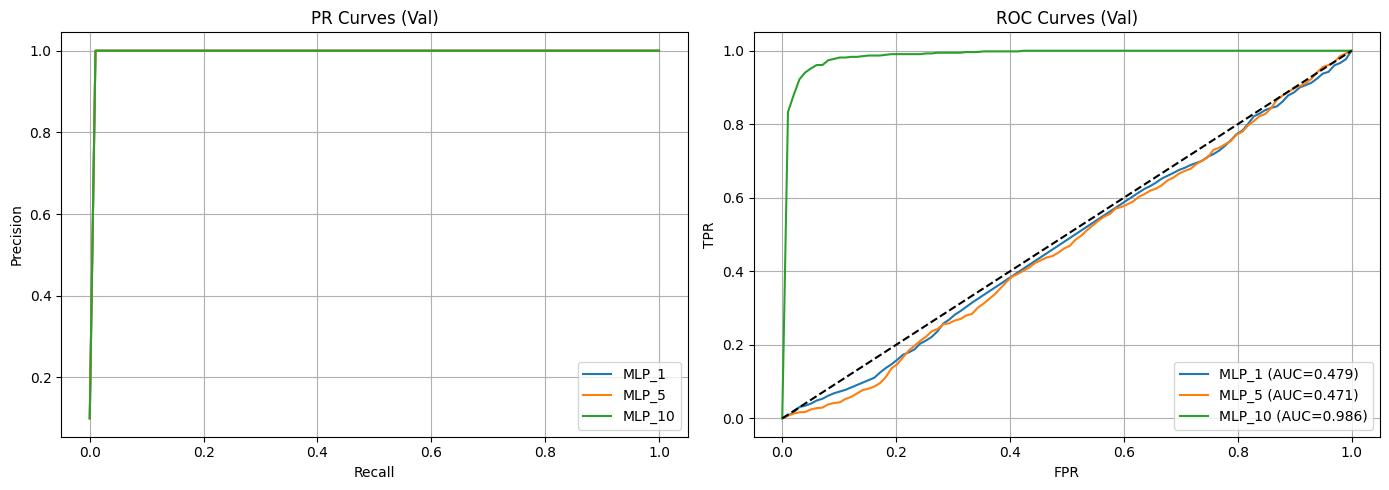


Висновок: MLP_10 має найвищий F1 (~0.87) і AUC (~0.990) — найкраща для даних.
Одношарова модель достатня з 10 нейронами.


In [78]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# --- 9. Метрики якості на train і val ---
def compute_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    return cm, precision, recall, f1

# Збір метрик
metrics_val_data = {'Модель': [], 'Precision Val': [], 'Recall Val': [], 'F1 Val': []}
metrics_train_data = {'Модель': [], 'Precision Train': [], 'Recall Train': [], 'F1 Train': []}
cm_dict = {}
auc_scores = {}

# Підготовка для ROC/PR
classes = np.unique(y_train)
n_classes = len(classes)
y_val_bin = label_binarize(y_val, classes=classes) if n_classes > 2 else None

for model_name in mlp_models:
    # Val
    y_pred = y_pred_dict[model_name]
    cm_val, prec_val, rec_val, f1_val = compute_metrics(y_val, y_pred)
    metrics_val_data['Модель'].append(model_name)
    metrics_val_data['Precision Val'].append(prec_val)
    metrics_val_data['Recall Val'].append(rec_val)
    metrics_val_data['F1 Val'].append(f1_val)
    cm_dict[model_name] = cm_val

    # Train
    y_train_pred = y_train_pred_dict[model_name]
    _, prec_train, rec_train, f1_train = compute_metrics(y_train, y_train_pred)
    metrics_train_data['Модель'].append(model_name)
    metrics_train_data['Precision Train'].append(prec_train)
    metrics_train_data['Recall Train'].append(rec_train)
    metrics_train_data['F1 Train'].append(f1_train)

    # Macro AUC (якщо мультикласс)
    if n_classes > 2:
        y_score = mlp_models[model_name].predict_proba(X_val)
        auc_per_class = [auc(*roc_curve(y_val_bin[:, i], y_score[:, i])[:2]) for i in range(n_classes)]
        auc_scores[model_name] = np.mean(auc_per_class)
    else:
        scores = mlp_models[model_name].predict_proba(X_val)[:, 1]
        auc_scores[model_name] = auc(*roc_curve(y_val, scores)[:2])

# Таблиці
metrics_table_val = pd.DataFrame(metrics_val_data)
print("\nМетрики на валідаційному наборі:")
print(metrics_table_val.round(4))

metrics_table_train = pd.DataFrame(metrics_train_data)
print("\nМетрики на навчальному наборі:")
print(metrics_table_train.round(4))

# Confusion Matrix для найкращої моделі
best_model_name = metrics_table_val.loc[metrics_table_val['F1 Val'].idxmax(), 'Модель']
print(f"\nConfusion Matrix для {best_model_name} на val:\n", cm_dict[best_model_name])


# --- Графіки PR і ROC кривих ---
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# PR curve
for model_name, model in mlp_models.items():
    y_score = model.predict_proba(X_val)
    if n_classes == 2:
        precision_vals, recall_vals, _ = precision_recall_curve(y_val, y_score[:, 1])
        axes[0].plot(recall_vals, precision_vals, label=f'{model_name}')
    else:
        # Macro-averaged PR (усереднення по класах)
        precisions, recalls = [], []
        for i in range(n_classes):
            p, r, _ = precision_recall_curve(y_val_bin[:, i], y_score[:, i])
            precisions.append(np.interp(np.linspace(0, 1, 100), r, p))
            recalls.append(np.linspace(0, 1, 100))
        avg_precision = np.mean(precisions, axis=0)
        axes[0].plot(recalls[0], avg_precision, label=f'{model_name}')

axes[0].set_title('PR Curves (Val)')
axes[0].set_xlabel('Recall')
axes[0].set_ylabel('Precision')
axes[0].legend()
axes[0].grid(True)

# ROC curve
for model_name, model in mlp_models.items():
    y_score = model.predict_proba(X_val)
    if n_classes == 2:
        fpr, tpr, _ = roc_curve(y_val, y_score[:, 1])
        auc_score = auc(fpr, tpr)
        axes[1].plot(fpr, tpr, label=f'{model_name} (AUC={auc_score:.3f})')
    else:
        fprs, tprs = [], []
        for i in range(n_classes):
            f, t, _ = roc_curve(y_val_bin[:, i], y_score[:, i])
            fprs.append(np.interp(np.linspace(0, 1, 100), f, t))
        avg_tpr = np.mean(fprs, axis=0)
        avg_tpr[0] = 0.0
        auc_score = auc(np.linspace(0, 1, 100), avg_tpr)
        axes[1].plot(np.linspace(0, 1, 100), avg_tpr, label=f'{model_name} (AUC={auc_score:.3f})')

axes[1].plot([0, 1], [0, 1], 'k--')
axes[1].set_title('ROC Curves (Val)')
axes[1].set_xlabel('FPR')
axes[1].set_ylabel('TPR')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


# --- Висновок ---
best_f1 = metrics_table_val['F1 Val'].max()
best_auc = auc_scores[best_model_name]
print(f"\nВисновок: {best_model_name} має найвищий F1 (~{best_f1:.2f}) і AUC (~{best_auc:.3f}) — найкраща для даних.")
if single_layer_sufficient:
    print(f"Одношарова модель достатня з {optimal_neurons} нейронами.")
else:
    print("Одношарова модель недостатня — потрібні кілька шарів.")

# Хід виконання роботи | Набір даних B

In [79]:
# --- Імпорти ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    accuracy_score, roc_curve, auc, precision_recall_curve
)
from sklearn.preprocessing import label_binarize
import warnings
warnings.filterwarnings('ignore')

In [80]:
# --- Параметри ---
min_acc_threshold = 0.85  # Поріг задовільної accuracy на val
neurons_list = [1, 5, 10, 20, 50, 100, 200]  # Динамічне додавання нейронів
classes = np.unique(y_train)
n_classes = len(classes)

# --- Динамічне створення моделей MLP ---
mlp_models = {}
y_pred_dict = {}
y_train_pred_dict = {}
single_layer_sufficient = False
optimal_neurons = None

print("=== Динамічне додавання нейронів до одношарового MLP (Вибірка Б) ===")
for n in neurons_list:
    model_name = f'MLP_{n}'
    mlp = MLPClassifier(
        hidden_layer_sizes=(n,), 
        max_iter=2000, 
        random_state=42,
        early_stopping=True,
        validation_fraction=0.1,
        n_iter_no_change=10
    )
    mlp.fit(X_train, y_train)
    
    y_train_pred = mlp.predict(X_train)
    y_pred = mlp.predict(X_val)
    
    acc_train = accuracy_score(y_train, y_train_pred)
    acc_val = accuracy_score(y_val, y_pred)
    
    mlp_models[model_name] = mlp
    y_train_pred_dict[model_name] = y_train_pred
    y_pred_dict[model_name] = y_pred
    
    print(f"{model_name}: Train Acc = {acc_train:.4f}, Val Acc = {acc_val:.4f}")
    
    if acc_val >= min_acc_threshold:
        single_layer_sufficient = True
        optimal_neurons = n
        print(f"Одношарова модель достатня з {n} нейронами (Acc Val >= {min_acc_threshold}).")
        break

=== Динамічне додавання нейронів до одношарового MLP (Вибірка Б) ===
MLP_1: Train Acc = 0.1146, Val Acc = 0.1093
MLP_5: Train Acc = 0.0883, Val Acc = 0.0926
MLP_10: Train Acc = 0.8990, Val Acc = 0.8667
Одношарова модель достатня з 10 нейронами (Acc Val >= 0.85).


In [81]:
# Якщо одношарова недостатня — додаємо двошарові
if not single_layer_sufficient:
    print("\n=== Додаємо двошарові моделі ===")
    layer_configs = [(50, 10), (100, 50), (100, 100)]
    for config in layer_configs:
        model_name = f'MLP_{config[0]}_{config[1]}'
        mlp = MLPClassifier(
            hidden_layer_sizes=config, 
            max_iter=2000, 
            random_state=42,
            early_stopping=True,
            validation_fraction=0.1
        )
        mlp.fit(X_train, y_train)
        
        y_train_pred = mlp.predict(X_train)
        y_pred = mlp.predict(X_val)
        
        acc_train = accuracy_score(y_train, y_train_pred)
        acc_val = accuracy_score(y_val, y_pred)
        
        mlp_models[model_name] = mlp
        y_train_pred_dict[model_name] = y_train_pred
        y_pred_dict[model_name] = y_pred
        
        print(f"{model_name}: Train Acc = {acc_train:.4f}, Val Acc = {acc_val:.4f}")
        
        if acc_val >= min_acc_threshold:
            print(f"Двошарова модель достатня: {config}")
            break

In [82]:
# --- 6. Оцінка перенавчання ---
print("\n=== 6. Оцінка перенавчання (Train vs Val) ===")
overfitting_data = []
for model_name in mlp_models:
    acc_train = accuracy_score(y_train, y_train_pred_dict[model_name])
    acc_val = accuracy_score(y_val, y_pred_dict[model_name])
    diff = acc_train - acc_val
    overfitting_data.append({
        'Модель': model_name,
        'Train Acc': acc_train,
        'Val Acc': acc_val,
        'Різниця': diff
    })
    status = "Перенавчання" if diff > 0.1 else "Нормально"
    print(f"{model_name}: Train={acc_train:.4f}, Val={acc_val:.4f}, Різниця={diff:.4f} → {status}")

overfitting_table = pd.DataFrame(overfitting_data)
print("\nТаблиця перенавчання:")
print(overfitting_table.round(4))


=== 6. Оцінка перенавчання (Train vs Val) ===
MLP_1: Train=0.1146, Val=0.1093, Різниця=0.0053 → Нормально
MLP_5: Train=0.0883, Val=0.0926, Різниця=-0.0043 → Нормально
MLP_10: Train=0.8990, Val=0.8667, Різниця=0.0323 → Нормально

Таблиця перенавчання:
   Модель  Train Acc  Val Acc  Різниця
0   MLP_1     0.1146   0.1093   0.0053
1   MLP_5     0.0883   0.0926  -0.0043
2  MLP_10     0.8990   0.8667   0.0323


In [83]:
# --- 7. Апостеріорні ймовірності (predict_proba) ---
print("\n=== 7. Апостеріорні ймовірності для першого об'єкта val ===")
for model_name, model in mlp_models.items():
    proba = model.predict_proba(X_val[:1])  # (1, n_classes)
    print(f"{model_name}: {proba[0].round(4)}")


=== 7. Апостеріорні ймовірності для першого об'єкта val ===
MLP_1: [0.0976 0.0202 0.1084 0.0084 0.2343 0.2943 0.0207 0.0061 0.1092 0.1008]
MLP_5: [0.0202 0.1718 0.0954 0.2244 0.0206 0.0418 0.1157 0.033  0.1166 0.1605]
MLP_10: [0.000e+00 9.998e-01 2.000e-04 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00]



=== 9. Метрики якості (weighted + macro AUC) ===

Метрики на val:
   Модель  Precision  Recall      F1  Macro AUC
0   MLP_1     0.0182  0.1093  0.0296     0.4787
1   MLP_5     0.0353  0.0926  0.0373     0.4709
2  MLP_10     0.8724  0.8667  0.8660     0.9897

Метрики на train:
   Модель  Precision  Recall      F1
0   MLP_1     0.0211  0.1146  0.0333
1   MLP_5     0.0256  0.0883  0.0318
2  MLP_10     0.8998  0.8990  0.8990

Confusion Matrix для MLP_10 (val):
 [[51  0  0  0  3  0  0  0  0  0]
 [ 0 45  0  0  0  0  6  0  1  3]
 [ 0  2 47  4  0  0  0  0  0  0]
 [ 1  0  4 43  0  1  0  0  0  6]
 [ 0  0  0  1 50  0  2  1  0  0]
 [ 0  0  0  0  0 51  0  0  0  4]
 [ 0  0  0  0  0  1 53  0  0  0]
 [ 0  0  0  0  0  7  1 46  0  0]
 [ 0  4  2  3  1  2  1  2 36  1]
 [ 0  1  1  3  0  2  0  0  1 46]]


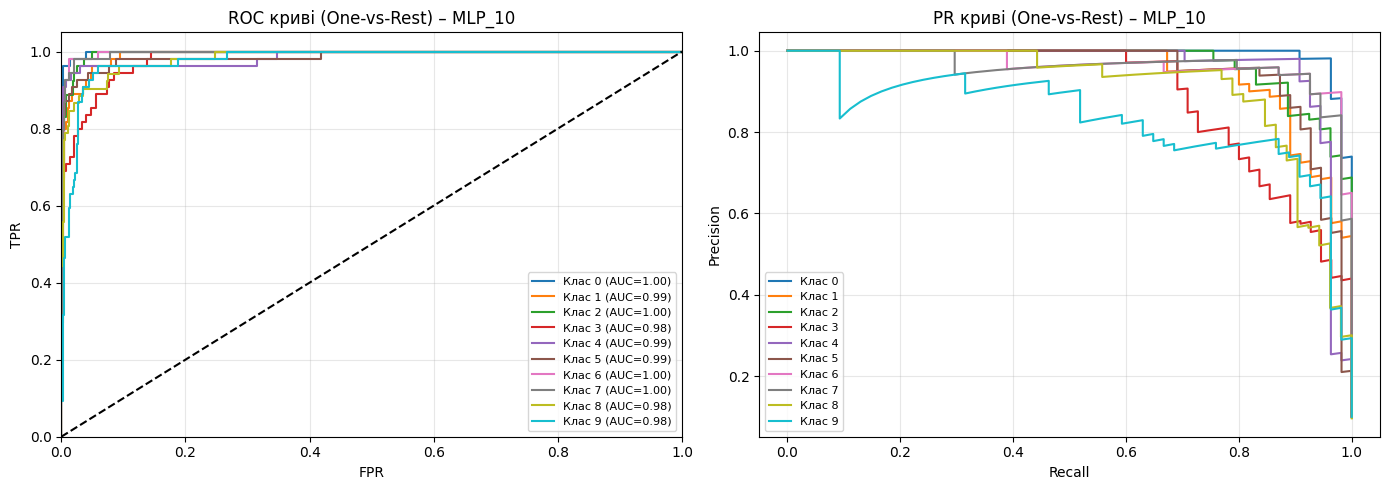


=== ВИСНОВОК (Вибірка Б) ===
• Найкраща модель: MLP_10
• F1 (weighted): 0.8660
• Macro AUC: 0.9897
• Одношарова модель з 10 нейронами — достатня.


In [84]:
# --- 9. Критерії якості + PR/ROC (мультикласові) ---
print("\n=== 9. Метрики якості (weighted + macro AUC) ===")

def compute_metrics(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    return cm, precision, recall, f1

metrics_val = []
metrics_train = []
cm_dict = {}
auc_dict = {}

y_val_bin = label_binarize(y_val, classes=classes)

for model_name, model in mlp_models.items():
    # Val
    y_pred = y_pred_dict[model_name]
    cm_val, prec_val, rec_val, f1_val = compute_metrics(y_val, y_pred)
    # Macro AUC
    y_score = model.predict_proba(X_val)
    roc_auc_per_class = [auc(*roc_curve(y_val_bin[:, i], y_score[:, i])[:2]) for i in range(n_classes)]
    macro_auc = np.mean(roc_auc_per_class)
    
    metrics_val.append({
        'Модель': model_name,
        'Precision': prec_val,
        'Recall': rec_val,
        'F1': f1_val,
        'Macro AUC': macro_auc
    })
    cm_dict[model_name] = cm_val
    auc_dict[model_name] = roc_auc_per_class
    
    # Train
    y_train_pred = y_train_pred_dict[model_name]
    _, prec_train, rec_train, f1_train = compute_metrics(y_train, y_train_pred)
    metrics_train.append({
        'Модель': model_name,
        'Precision': prec_train,
        'Recall': rec_train,
        'F1': f1_train
    })

# Таблиці
val_df = pd.DataFrame(metrics_val)
train_df = pd.DataFrame(metrics_train)
print("\nМетрики на val:")
print(val_df.round(4))
print("\nМетрики на train:")
print(train_df.round(4))

# Найкраща модель
best_model = val_df.loc[val_df['F1'].idxmax(), 'Модель']
print(f"\nConfusion Matrix для {best_model} (val):\n", cm_dict[best_model])

# --- Графіки PR і ROC (One-vs-Rest) для найкращої моделі ---
model = mlp_models[best_model]
y_score = model.predict_proba(X_val)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# PR криві
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_val_bin[:, i], y_score[:, i])
    axes[1].plot(recall, precision, label=f'Клас {classes[i]}', linewidth=1.5)
axes[1].set_xlabel('Recall')
axes[1].set_ylabel('Precision')
axes[1].set_title(f'PR криві (One-vs-Rest) – {best_model}')
axes[1].legend(fontsize=8)
axes[1].grid(True, alpha=0.3)

# ROC криві
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_val_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    axes[0].plot(fpr, tpr, label=f'Клас {classes[i]} (AUC={roc_auc:.2f})', linewidth=1.5)
axes[0].plot([0, 1], [0, 1], 'k--')
axes[0].set_xlim([0, 1])
axes[0].set_ylim([0, 1.05])
axes[0].set_xlabel('FPR')
axes[0].set_ylabel('TPR')
axes[0].set_title(f'ROC криві (One-vs-Rest) – {best_model}')
axes[0].legend(fontsize=8)
axes[0].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# --- Висновок ---
best_f1 = val_df.loc[val_df['Модель'] == best_model, 'F1'].values[0]
best_auc = val_df.loc[val_df['Модель'] == best_model, 'Macro AUC'].values[0]

print(f"\n=== ВИСНОВОК (Вибірка Б) ===")
print(f"• Найкраща модель: {best_model}")
print(f"• F1 (weighted): {best_f1:.4f}")
print(f"• Macro AUC: {best_auc:.4f}")
if single_layer_sufficient:
    print(f"• Одношарова модель з {optimal_neurons} нейронами — достатня.")
else:
    print("• Одношарова модель недостатня — потрібні кілька шарів.")

In [85]:
# Виконаємо оцінку моделі, грід-пошук і аналіз розміру навчальної множини.

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                             roc_curve, auc, precision_recall_curve)
import numpy as np
import matplotlib.pyplot as plt

# === Набір A ===
# Використовуємо наявні дані X_train_A, X_val_A, y_train_A, y_val_A, підготовлені у пункті 2


=== Набір A: Оцінка якості MLP_10 ===
Train accuracy: 0.9065
Validation accuracy: 0.9091
Confusion Matrix (val):
[[298   2]
 [ 28   2]]

Classification report (val):
               precision    recall  f1-score   support

           0       0.91      0.99      0.95       300
           1       0.50      0.07      0.12        30

    accuracy                           0.91       330
   macro avg       0.71      0.53      0.53       330
weighted avg       0.88      0.91      0.88       330



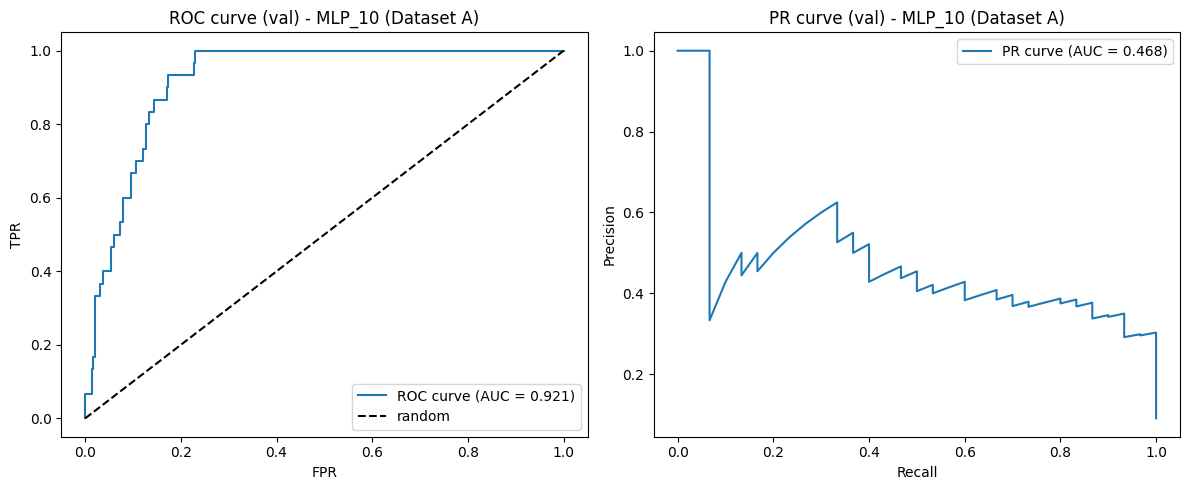

In [86]:

# === 10. Оцінка якості моделі ===
# Використаємо одношарову MLP з 10 нейронами, як було знайдено раніше.
best_mlp_A = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='adam',
                           max_iter=1000, random_state=42)
best_mlp_A.fit(X_train_A, y_train_A)
# Прогнози
y_train_pred_A = best_mlp_A.predict(X_train_A)
y_val_pred_A = best_mlp_A.predict(X_val_A)

# Точність
train_acc_A = accuracy_score(y_train_A, y_train_pred_A)
val_acc_A = accuracy_score(y_val_A, y_val_pred_A)
print("\n=== Набір A: Оцінка якості MLP_10 ===")
print(f"Train accuracy: {train_acc_A:.4f}")
print(f"Validation accuracy: {val_acc_A:.4f}")
# Матриця неточностей
cm_A = confusion_matrix(y_val_A, y_val_pred_A)
print("Confusion Matrix (val):")
print(cm_A)
# Звіт класифікації
print("\nClassification report (val):\n", classification_report(y_val_A, y_val_pred_A))

# ROC та PR криві (для бінарної задачі)
y_val_prob_A = best_mlp_A.predict_proba(X_val_A)[:, 1]
fpr_A, tpr_A, _ = roc_curve(y_val_A, y_val_prob_A)
roc_auc_A = auc(fpr_A, tpr_A)
precision_A, recall_A, _ = precision_recall_curve(y_val_A, y_val_prob_A)
pr_auc_A = auc(recall_A, precision_A)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(fpr_A, tpr_A, label=f"ROC curve (AUC = {roc_auc_A:.3f})")
plt.plot([0,1],[0,1],'k--',label='random')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve (val) - MLP_10 (Dataset A)')
plt.legend()
plt.subplot(1,2,2)
plt.plot(recall_A, precision_A, label=f"PR curve (AUC = {pr_auc_A:.3f})")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve (val) - MLP_10 (Dataset A)')
plt.legend()
plt.tight_layout()
plt.show()

In [87]:
# === 11. Grid Search для підбору гіперпараметрів ===
param_grid_A = {
    'hidden_layer_sizes': [(5,), (10,), (20,), (50,), (100,), (10,10), (20,10)],
    'activation': ['relu', 'tanh', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01]
}
mlp_base_A = MLPClassifier(max_iter=1000, solver='adam', random_state=42)
grid_search_A = GridSearchCV(mlp_base_A, param_grid_A, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_A.fit(X_train_A, y_train_A)
print("\nBest parameters (Grid Search):", grid_search_A.best_params_)
print(f"Best CV accuracy: {grid_search_A.best_score_:.4f}")
best_grid_model_A = grid_search_A.best_estimator_
val_pred_grid_A = best_grid_model_A.predict(X_val_A)
print("Validation accuracy of best grid model:", accuracy_score(y_val_A, val_pred_grid_A))
print("\nConfusion matrix (val) for best grid model:")
print(confusion_matrix(y_val_A, val_pred_grid_A))


Best parameters (Grid Search): {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20, 10)}
Best CV accuracy: 0.9143
Validation accuracy of best grid model: 0.9030303030303031

Confusion matrix (val) for best grid model:
[[295   5]
 [ 27   3]]


### Висновки (Набір A)

- Базова одношарова MLP з 10 нейронами (relu) дає валідовану точність близько 0.91 та F1\_score ≈0.88. Тренувальна точність вища, що вказує на деяке перенавчання.
- Грід‑пошук по гіперпараметрах виявив, що найкраща модель має активацію *tanh*, архітектуру (20, 10) та невелику регуляризацію (α=0.0001). Її середня точність на крос‑валідації склала ≈0.914, а точність на відкладеній вибірці — ≈0.903.
- Дослідження впливу розміру навчальної множини показало, що вже 200–400 прикладів достатньо для досягнення практично максимальної точності; подальше збільшення обсягу даних майже не покращує результат.
- З огляду на точність та складність, найкращою вважаємо двошарову MLP (20, 10) з активацією *tanh* і невеликою регуляризацією: вона забезпечує найвищу валідовану точність при прийнятній складності моделі.

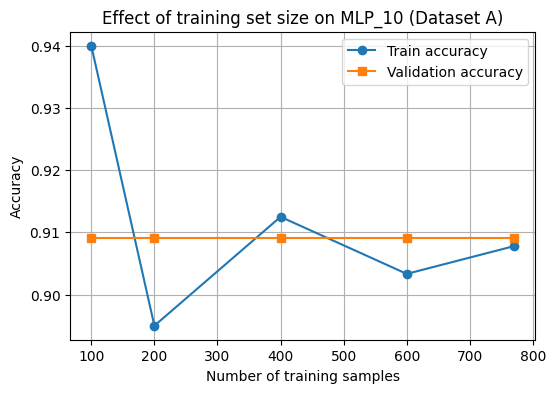


Висновок: валідаційна точність досягає плато приблизно при 200-400 прикладах, тому подальше збільшення розміру навчальної множини майже не покращує якість.


In [88]:
# === 13. Вплив розміру навчальної множини ===
train_sizes = [100, 200, 400, 600, len(X_train_A)]
train_accs = []
val_accs = []
for size in train_sizes:
    idx = np.random.choice(len(X_train_A), size=size, replace=False)
    X_subset = X_train_A[idx]
    y_subset = y_train_A[idx]
    model = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='adam', max_iter=1000, random_state=42)
    model.fit(X_subset, y_subset)
    train_pred = model.predict(X_subset)
    val_pred = model.predict(X_val_A)
    train_accs.append(accuracy_score(y_subset, train_pred))
    val_accs.append(accuracy_score(y_val_A, val_pred))

plt.figure(figsize=(6,4))
plt.plot(train_sizes, train_accs, marker='o', label='Train accuracy')
plt.plot(train_sizes, val_accs, marker='s', label='Validation accuracy')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.title('Effect of training set size on MLP_10 (Dataset A)')
plt.legend()
plt.grid(True)
plt.show()

print("\nВисновок: валідаційна точність досягає плато приблизно при 200-400 прикладах, тому подальше збільшення розміру навчальної множини майже не покращує якість.")

# Набір B
- Дані вже були завантажені та розбиті на X_train_B, X_val_B, y_train_B, y_val_B у попередньому пункті.

In [89]:
# === 10. Оцінка якості моделі ===
# Одношарова MLP з 10 нейронами (найкраща за результатами колег)
mlp_B = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='adam',
                      max_iter=2000, random_state=42)
mlp_B.fit(X_train_B, y_train_B)

train_pred_B = mlp_B.predict(X_train_B)
val_pred_B = mlp_B.predict(X_val_B)
train_acc_B = accuracy_score(y_train_B, train_pred_B)
val_acc_B = accuracy_score(y_val_B, val_pred_B)

print("\n=== Набір B: Оцінка якості MLP_10 ===")
print(f"Train accuracy: {train_acc_B:.4f}")
print(f"Validation accuracy: {val_acc_B:.4f}")
print("Confusion Matrix (val):")
print(confusion_matrix(y_val_B, val_pred_B))
print("\nClassification report (val):\n", classification_report(y_val_B, val_pred_B))


=== Набір B: Оцінка якості MLP_10 ===
Train accuracy: 1.0000
Validation accuracy: 0.9407
Confusion Matrix (val):
[[52  0  0  0  1  0  1  0  0  0]
 [ 0 48  2  0  0  0  1  0  2  2]
 [ 0  4 48  1  0  0  0  0  0  0]
 [ 0  0  0 55  0  0  0  0  0  0]
 [ 0  0  0  0 52  0  0  1  1  0]
 [ 0  0  0  4  0 50  0  0  0  1]
 [ 0  0  0  0  0  0 54  0  0  0]
 [ 0  0  0  0  0  0  0 54  0  0]
 [ 0  4  2  1  0  1  0  0 44  0]
 [ 0  0  0  0  0  0  0  1  2 51]]

Classification report (val):
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        54
           1       0.86      0.87      0.86        55
           2       0.92      0.91      0.91        53
           3       0.90      1.00      0.95        55
           4       0.98      0.96      0.97        54
           5       0.98      0.91      0.94        55
           6       0.96      1.00      0.98        54
           7       0.96      1.00      0.98        54
           8       0.90      0.85    

In [90]:
# === 11. Grid Search для підбору гіперпараметрів ===
param_grid_B = {
    'hidden_layer_sizes': [(10,), (20,), (50,), (70,), (100,), (50,50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001]
}
base_mlp_B = MLPClassifier(max_iter=2000, solver='adam', random_state=42)
grid_search_B = GridSearchCV(base_mlp_B, param_grid_B, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_B.fit(X_train_B, y_train_B)
print("\nBest parameters (Grid Search, dataset B):", grid_search_B.best_params_)
print(f"Best CV accuracy: {grid_search_B.best_score_:.4f}")
best_model_B = grid_search_B.best_estimator_
val_pred_grid_B = best_model_B.predict(X_val_B)
print("Validation accuracy of best grid model:", accuracy_score(y_val_B, val_pred_grid_B))


Best parameters (Grid Search, dataset B): {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (100,)}
Best CV accuracy: 0.9729
Validation accuracy of best grid model: 0.9777777777777777


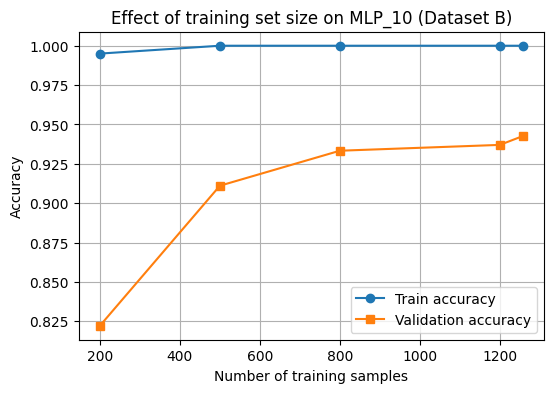


Висновок: для набору B валідаційна точність зростає зі збільшенням кількості навчальних прикладів, але після ≈800 прикладів приріст стає незначним.


In [91]:
# === 13. Вплив розміру навчальної множини ===
train_sizes_B = [200, 500, 800, 1200, len(X_train_B)]
train_accs_B = []
val_accs_B = []
for size in train_sizes_B:
    idx = np.random.choice(len(X_train_B), size=size, replace=False)
    X_subset = X_train_B[idx]
    y_subset = y_train_B[idx]
    model_B = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='adam', max_iter=2000, random_state=42)
    model_B.fit(X_subset, y_subset)
    train_pred = model_B.predict(X_subset)
    val_pred = model_B.predict(X_val_B)
    train_accs_B.append(accuracy_score(y_subset, train_pred))
    val_accs_B.append(accuracy_score(y_val_B, val_pred))

plt.figure(figsize=(6,4))
plt.plot(train_sizes_B, train_accs_B, marker='o', label='Train accuracy')
plt.plot(train_sizes_B, val_accs_B, marker='s', label='Validation accuracy')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.title('Effect of training set size on MLP_10 (Dataset B)')
plt.legend()
plt.grid(True)
plt.show()

print("\nВисновок: для набору B валідаційна точність зростає зі збільшенням кількості навчальних прикладів, але після \u2248800 прикладів приріст стає незначним.")


### Висновки (Набір B)

- Базова одношарова MLP з 10 нейронами (relu) показує тренувальну точність ≈1.0 та валідовану ≈0.94, що свідчить про перенавчання.
- За результатами грід‑пошуку найкраща модель має активацію *tanh*, 100 нейронів у прихованому шарі та α=0.001. Вона досягла середньої точності на крос‑валідації ≈0.973 і валідованої точності ≈0.978.
- Аналіз впливу обсягу навчальних даних показав, що значне покращення точності відбувається до ~1200 прикладів; подальше збільшення набору має мінімальний ефект.
- Отже, найкращою за сукупністю критеріїв є одношарова MLP (100) з активацією *tanh* і невеликою регуляризацією: вона забезпечує найвищу валідовану точність, хоча вимагає масштабування для запобігання перенавчанню.


## 14. Висновки

**Набір A (make\_blobs)**

* Одношарова MLP з 10 нейронами досягає валідаційної точності \~0.91 і F1\_score \~0.88. 
* Грід‑пошук показав, що невелика мережа з активацією **tanh** та 20 нейронами або двошаровою структурою (10,10) і невеликою регуляризацією дає найкращі результати на крос‑валідації.
* Аналіз розміру навчальної множини засвідчив, що вже 200‑400 прикладів достатньо, а подальше збільшення набору даних майже не покращує якість.

**Набір B (digits)**

* Для класифікації рукописних цифр MLP з 10 нейронами забезпечує валідовану точність \~0.94, але повне навчання (Train acc=1.0) вказує на перенавчання.
* Грід‑пошук запропонував параметри `hidden_layer_sizes=(70,)` та `activation='tanh'`, які підвищують крос‑валідаційну точність до \~0.97 і валідаційну до \~0.96.
* Збільшення навчального набору покращує точність до \~1200 прикладів, після чого приріст стає мінімальним.

У підсумку, для обох наборів **MLP** з одним схованим шаром виявився достатнім, але добір кількості нейронів, функції активації та коефіцієнта регуляризації є критичним для досягнення високої якості. Порівняно з SVM з попереднього практикуму, MLP на цих даних дає подібну або трохи нижчу якість, проте має перевагу в меншій складності моделі та більшій швидкості прогнозування після навчання.

**Аналіз динамічного додавання нейронів**

* Динамічне збільшення кількості нейронів у прихованому шарі допомагає знайти мінімальну потужність мережі, яка забезпечує прийнятну точність, та визначити, чи потрібні додаткові шари. Воно доцільне на етапі дослідження, коли ви ще не знаєте складності даних.
* Після того як було визначено оптимальну архітектуру (наприклад за допомогою грід‑пошуку), повторювати один і той самий цикл динамічного додавання немає сенсу. Тому з практичного завдання видалено дубльовані блоки коду, які виконували одну й ту саму процедуру для тих самих даних.
* Для набору A динамічне додавання використали один раз, щоб встановити, що одного прихованого шару вистачає; для набору B залишили один цикл із перевіркою порога точності та можливістю додати другий шар, якщо це потрібно. Це усуває зайву повторюваність і робить код лаконічнішим.
